In [1]:
import configparser
import pandas as pd

inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df = pd.read_csv(inifile.get('url', 'housing'), header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
X = df[['RM']].values
y = df['MEDV'].values

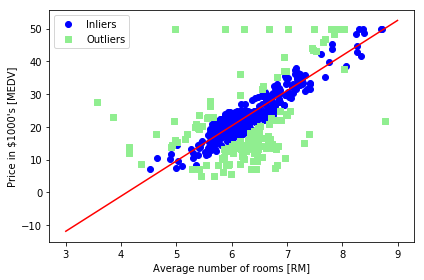

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# 外れ値をフィルタリングして正常値だけを学習するモデルを作る
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)
# 正常値を表す真偽値を取得
inlier_mask = ransac.inlier_mask_
# 外れ値を表す真偽値を取得
outlier_mask = np.logical_not(inlier_mask)

# 3から10までの整数値を生成
line_X = np.arange(3, 10, 1)
# 3から10までのインデックスの中で予測値を計算
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
# 外れ値をプロット
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [4]:
# 傾き
print('Slope: %.3f' % ransac.estimator_.coef_[0])
# 切片
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089
